In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import warnings


In [27]:
data=pd.read_csv("C:\\Pandas-using-in-EDA-master\\Pandas-using-in-EDA-master\\housing_dataset.csv")
data
X = data[['longitude', 'latitude']]  
y = data['population']  


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred


array([ 991,  900,  981, ...,  675,  877, 1127], dtype=int64)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")


Model Accuracy: 0.07%


In [22]:
h = .02  
x_min, x_max = X['longitude'].min() - 1, X['longitude'].max() + 1
y_min, y_max = X['latitude'].min() - 1, X['latitude'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [15]:
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


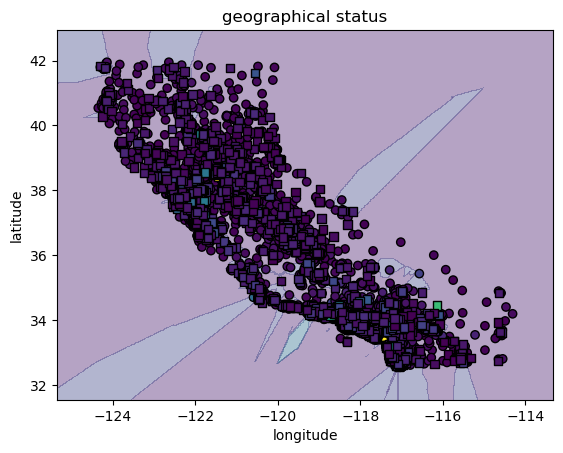

In [26]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train['longitude'], X_train['latitude'], c=y_train, marker='o', edgecolor='k', label='Training Data')
plt.scatter(X_test['longitude'], X_test['latitude'], c=y_test, marker='s', edgecolor='k', label='Test Data')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('geographical status')
plt.show()
